<a href="https://colab.research.google.com/github/vishesh342/Data-Analytics-Titanic-Dataset/blob/main/Titanic_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TITANIC DATA_ANALYIS**

RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean on 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City . The sinking of Titanic at the time was one of the deadliest of a single ship and the deadliest peacetime sinking of a superliner or cruise ship to date. With much public attention in the aftermath, the disaster has since been the material of many artistic works and a founding material of the disaster film genre.


We will analyse:
- The Percentage of deaths
- Gender wise Death Percentage
- Visualise Death percentage basis of Class
- Who had a larger survival chance - one who travelled alone or in a group?
- Verify the survival rate based on Fare.



In [ ]:
#importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Import csv as DataFrame
df=pd.read_csv('/content/drive/MyDrive/Antrix Academy/titanic_data.csv')

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Shape of data
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#To Find the Null Values present in 'Age' Attribute. 
df['Age'].isnull().value_counts()


False    714
True     177
Name: Age, dtype: int64

In [ ]:
#To Find the Null Values present in 'Cabin' Attribute. 
df['Cabin'].isnull().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


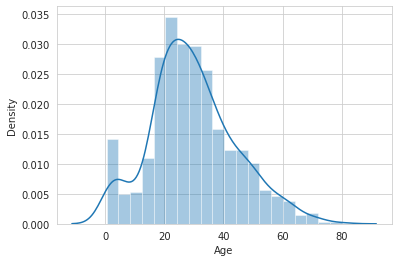

In [ ]:
#Plotting the data distribution to choose the correct measure to fill Missing values.
sns.set_style("whitegrid")
x=df['Age']
sns.distplot(x.dropna())

Since the 'Age' attribute is nearly normally distributed therefore it is safe to fill the missing values with the mean value.


In [ ]:

mean=df['Age'].mean()
df['Age'].fillna(value=mean,inplace=True)


In [ ]:
#Dropping Unnecessary Attributes.
df.drop(['Cabin','Ticket','Name'],axis=1,inplace=True)

# Percentage of deaths

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


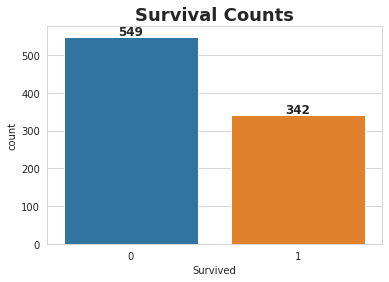

In [ ]:
#Plotting Deaths v/s  Survival Count
p=sns.countplot(df['Survived'])
p.axes.set_title('Survival Counts', fontsize=18, fontweight='bold')

sns.set_style("whitegrid")

# Get bars and create bar labels
bars_list =  p.patches            # axis.patches gives the bar objects produced by the plot
deaths = len(df[(df['Survived'] == 0)])
survivors = len(df[(df['Survived'] == 1)])
bar_labels = [str(freq) for freq in [deaths,survivors]]

# Place bar labels
for bar, label in zip(bars_list, bar_labels):    
    p.text((bar.get_x() + bar.get_width()/2), (bar.get_height() + 4), label, ha='center', size=12, fontweight='bold')




In [ ]:
#Calculate the percent_survive & percent_death
survive=0
dead=0
for i in df.Survived:
  if(i==1):
    survive+=1
  else:
    dead+=1
    
percent_survive=survive/(survive+dead)
percent_dead=dead/(survive+dead)


Text(0.5, 1.0, 'Percent of Deaths')

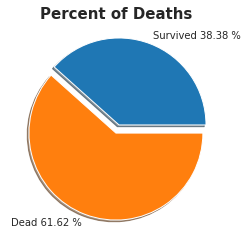

In [ ]:
#Plotting a pie-chart to visualize percent_death v/s percent_survive
x=[percent_survive,percent_dead]
labels=['Survived {} %'.format(round(percent_survive*100,2)),'Dead {} %'.format(round(percent_dead*100,2))]
plt.pie(x, labels=labels,explode={0.1,0},shadow=True)
plt.title('Percent of Deaths',fontsize=15,fontweight='bold')

##Gender wise Death Percentage

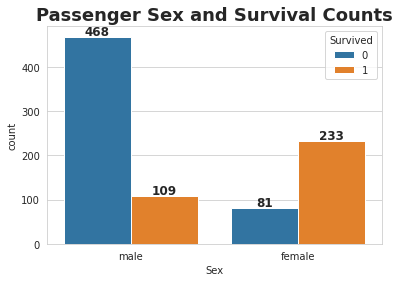

In [ ]:
#Plotting Coun of deaths based on Gender
sns.set_style("whitegrid")
g= sns.countplot(x ='Sex', hue = "Survived", data = df)
g.axes.set_title('Passenger Sex and Survival Counts', fontsize=18, fontweight='bold')

# Get bars and create bar labels
bars_list =  g.patches          # axis.patches gives the bar objects produced by the plot
male_deaths = len(df[(df['Sex'] == 'male') & (df['Survived'] == 0)])
male_survivors = len(df[(df['Sex'] == 'male') & (df['Survived'] == 1)])
female_deaths = len(df[(df['Sex'] == 'female') & (df['Survived'] == 0)])
female_survivors = len(df[(df['Sex'] == 'female') & (df['Survived'] == 1)])
bar_labels = [str(freq) for freq in [male_deaths, female_deaths, male_survivors,female_survivors]]

# Place bar labels
for bar, label in zip(bars_list, bar_labels):        
    g.text((bar.get_x() + bar.get_width()/2), (bar.get_height() + 4), label, ha='center', size=12, fontweight='bold')

Text(0.5, 1.0, 'Percent of deaths based on Gender of person')

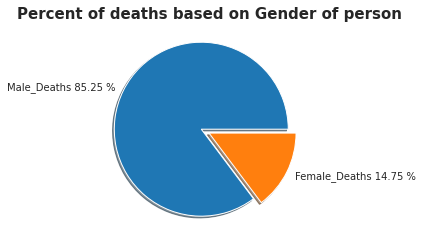

In [ ]:
#Plotting Percent of death based on gender
male_dead=len(df[(df['Sex'] == 'male') & (df['Survived'] == 0)])
female_dead=len(df[(df['Sex'] == 'female') & (df['Survived'] == 0)])

#Calculate the percent male death v/s percent female death
x=[male_dead,female_dead]
md=male_dead/(male_dead+female_dead)
fd=female_dead/(male_dead+female_dead)

labels=['Male_Deaths {} %'.format(round(md*100,2)),'Female_Deaths {} %'.format(round(fd*100,2))]
plt.pie(x, labels =labels,explode={0.1,0},shadow=True)
plt.title('Percent of deaths based on Gender of person',fontsize=15,fontweight='bold')

Interpretation:

**If a passenger is female, she is more likely to survive than her male counterparts.**

# Death percentage basis of Class

In [ ]:
#Unique Values in Class
df['Pclass'].unique()

array([3, 1, 2])

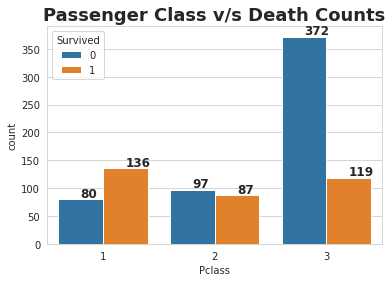

In [ ]:
#Plotting Coun of deaths based on Passenger Class
sns.set_style("whitegrid")
pc=sns.countplot(x ='Pclass', hue = "Survived", data = df)
pc.axes.set_title('Passenger Class v/s Death Counts', fontsize=18, fontweight='bold')

# Get bars and create bar labels
bars_list =  pc.patches              # axis.patches gives the bar objects produced by the plot
Class1d = len(df[(df['Pclass'] == 1) & (df['Survived'] == 0)])
Class1s = len(df[(df['Pclass'] == 1) & (df['Survived'] == 1)])

Class2d = len(df[(df['Pclass'] == 2) & (df['Survived'] == 0)])
Class2s = len(df[(df['Pclass'] == 2) & (df['Survived'] == 1)])

Class3d = len(df[(df['Pclass'] == 3) & (df['Survived'] == 0)])
Class3s = len(df[(df['Pclass'] == 3) & (df['Survived'] == 1)])

bar_labels = [str(freq) for freq in [Class1d,Class2d,Class3d,Class1s,Class2s,Class3s]]

# Place bar labels
for bar, label in zip(bars_list, bar_labels):        
    pc.text((bar.get_x() + bar.get_width()/2), (bar.get_height() + 4), label, size=12, fontweight='bold')






Text(0.5, 1.0, 'Percent of Deaths of people based Class')

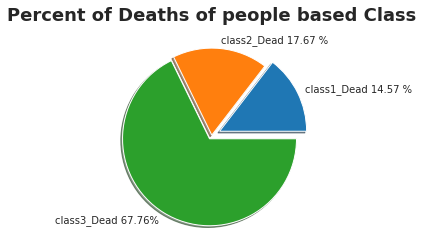

In [ ]:
#Plotting Percent of death based on Passenger Class
class1_Dead=len(df[(df['Pclass'] == 1) & (df['Survived'] == 0)])
class2_Dead=len(df[(df['Pclass'] == 2) & (df['Survived'] == 0)])
class3_Dead=len(df[(df['Pclass'] == 3) & (df['Survived'] == 0)])
x=[class1_Dead,class2_Dead,class3_Dead]

#Calculate the percent death based in class
cd1=class1_Dead/(class1_Dead+class2_Dead+class3_Dead)
cd2=class2_Dead/(class1_Dead+class2_Dead+class3_Dead)
cd3=class3_Dead/(class1_Dead+class2_Dead+class3_Dead)
labels=['class1_Dead {} %'.format(round(cd1*100,2)),'class2_Dead {} %'.format(round(cd2*100,2)),'class3_Dead {}%'.format(round(cd3*100,2))]

plt.pie(x, labels =labels,explode={0.1,0.05,0},shadow=True)
plt.title('Percent of Deaths of people based Class',fontsize=18,fontweight='bold')

Interpretation:

**The higher a passenger's class, the more likely that the passenger survives.**

#Based on Being Accompaied by someone

In [ ]:
#Unique Values in SibSp
a=sorted(df['SibSp'].unique())
print(a)


[0, 1, 2, 3, 4, 5, 8]


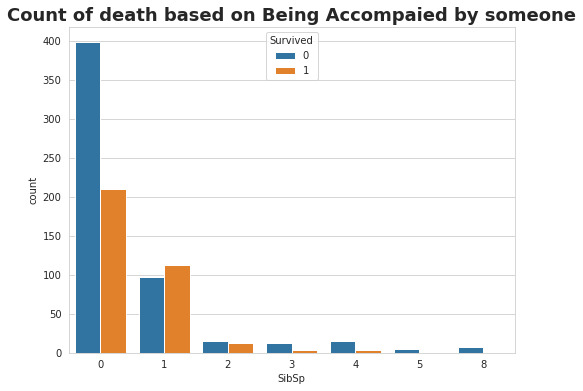

In [ ]:
#Plotting counts of death based on Number of people Accompanied by any individual
sns.set_style("whitegrid")
sp=sns.countplot(x ='SibSp', hue = "Survived", data = df)
sp.axes.set_title('Count of death based on Being Accompaied by someone',fontsize=18,fontweight='bold')
sp.figure.set_size_inches(8,6)


In [ ]:
#Calculate dead and Survivors based on Company 
Death_in_group=0
Survive_in_group=0
Death_alone=0
Survive_alone=0
for i in a:
  print("Number of Dead accompanied by {} people are: {} ".format(i,len(df[(df['SibSp'] == i) & (df['Survived'] == 0)])))
  print("Number of Survivors accompanied by {} people are: {} ".format(i,len(df[(df['SibSp'] == i) & (df['Survived'] == 1)])))
  if(i!=0):
    Survive_in_group+=len(df[(df['SibSp'] == i) & (df['Survived'] == 1)])
    Death_in_group+=len(df[(df['SibSp'] == i) & (df['Survived'] == 0)])

  else:
    Death_alone=len(df[(df['SibSp'] == i) & (df['Survived'] == 0)])
    Survive_alone=len(df[(df['SibSp'] == i) & (df['Survived'] == 1)])
    

print("\n")
print("Total Dead who travelled in group : ",Death_in_group)
print("Total Dead who travelled alone : ",Death_alone)



Number of Dead accompanied by 0 people are: 398 
Number of Survivors accompanied by 0 people are: 210 
Number of Dead accompanied by 1 people are: 97 
Number of Survivors accompanied by 1 people are: 112 
Number of Dead accompanied by 2 people are: 15 
Number of Survivors accompanied by 2 people are: 13 
Number of Dead accompanied by 3 people are: 12 
Number of Survivors accompanied by 3 people are: 4 
Number of Dead accompanied by 4 people are: 15 
Number of Survivors accompanied by 4 people are: 3 
Number of Dead accompanied by 5 people are: 5 
Number of Survivors accompanied by 5 people are: 0 
Number of Dead accompanied by 8 people are: 7 
Number of Survivors accompanied by 8 people are: 0 


Total Dead who travelled in group :  151
Total Dead who travelled alone :  398


Text(0.5, 1.0, 'Percent of Death of people based on travelling alone or in group')

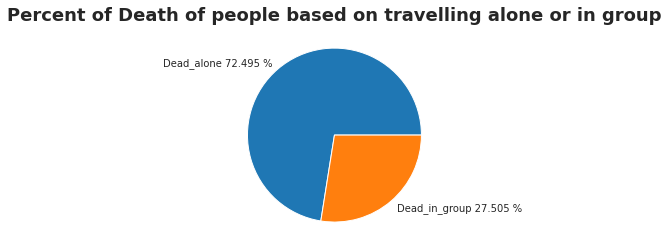

In [ ]:
#Plotting percent of survival of people based on travelling alone or in group
x=[Death_alone,Death_in_group]
lone_D=Death_alone/(Death_alone+Death_in_group)
group_D=Death_in_group/(Death_alone+Death_in_group)
label=['Dead_alone {} %'.format(round(lone_D*100,3)),'Dead_in_group {} %'.format(round(group_D*100,3))]
plt.pie(x,labels=label)

plt.title('Percent of Death of people based on travelling alone or in group',fontsize=18,fontweight='bold')



Interpretation:


**Fewer deaths were recorder for those who travelled alone.**



#Survival rate based on Fare

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


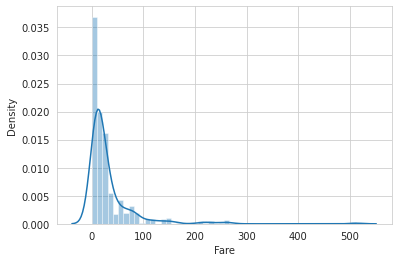

In [ ]:
#Distribution of Fare
sns.distplot(df['Fare'])

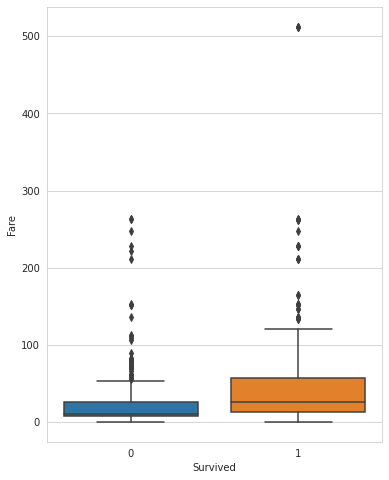

In [ ]:
#Finding Outliers 
bx_plt = sns.boxplot(x=df['Survived'], y=df['Fare'])
bx_plt.figure.set_size_inches(6,8)

The extreme outliers make it difficult to see the boxplot features. Let's remove extreme value(s) (fare >= 200) to improve the visualization.

In [ ]:

print ("No. extreme outliers (fare > 200):", len(df[df['Fare'] >= 200]), '\n')
print ('First 5 :' + '\n', df[df['Fare'] >= 200].head(5))

No. extreme outliers (fare > 200): 20 

First 5 :
      PassengerId  Survived  Pclass     Sex  ...  SibSp  Parch      Fare  Embarked
27            28         0       1    male  ...      3      2  263.0000         S
88            89         1       1  female  ...      3      2  263.0000         S
118          119         0       1    male  ...      0      1  247.5208         C
258          259         1       1  female  ...      0      0  512.3292         C
299          300         1       1  female  ...      0      1  247.5208         C

[5 rows x 9 columns]


In [ ]:

no_xtreme_outliers_df = df[df['Fare'] < 200].reset_index(drop=True)
no_xtreme_outliers_df.shape

(871, 9)

In [ ]:

titanic_by_survival = no_xtreme_outliers_df.groupby('Survived')
print(titanic_by_survival['Fare'].describe(percentiles=[0.5]))

          count       mean        std  min      50%       max
Survived                                                     
0         543.0  19.720801  21.562705  0.0  10.4625  153.4625
1         328.0  37.802998  36.289537  0.0  26.0000  164.8667


**Surviving passenger fares:**

Range: 164.87

Median: 26.00

Mean: 37.80

SD: 36.29


**Non-surviving passenger fares:**

Range: 153.46

Median: 10.46

Mean: 19.72

SD: 21.56

There appears to be a great deal of overlap amongst fares. I noticed this when I printed out the the first five entries of extreme outliers with fares above 200. All were for first class, but some fares were more than 500 when others were closer to 250.

#CONCLUSION
I investigated the variables (passenger characteristics) in terms of their relationship to survival: sex, class, fare. The analysis leading up to each conclusion is detailed in above sections.

**For the given DataSet of 891 Entries :**

**Percent of death :** Out of 891 entries 61.62% of Passengers(549) died in the accident.

**Gender wise Death Percentage :** Males Had a higher death ratio.Out of those who died , 85.25% of them(468) were Male.

**Death percentage basis of Class:**Passenger of Class-3 were more prone to death.67.72% of total passengers(372) who died were from Class-3.

**Death were recorded more for those who travelled solo.72.49% of total deaths were those of solo travelers.**

**Passenger fare likely correlates with survival:** cofounding variables like port and class affect the results, so it is hard to say for certain.



